In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 2GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
# check gpu

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# check version
# keras.__version__

In [4]:
train_dir = "../data/train"
val_dir = "../data/val"
test_dir = "../data/test"

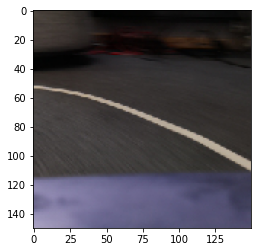

In [5]:
# Idea: cut images

fnames = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]
img_path = fnames[-1]
img = image.load_img(img_path, target_size=(150,150))
plt.imshow(img)
#x = image.img_to_array(img)

## create train generator

In [6]:
train_df = pd.read_csv("../data/train.csv", index_col=0)

In [7]:
train_df = pd.read_csv("../data/train.csv", index_col=0)
train_df['id'] = train_df.index
train_df['id'] = train_df['id'].apply(lambda x: x+".jpg")
train_df.head()

,dist_0,ABS_RX,ABS_Y,id
2020-06-16_08-59-11-257177,2221.29,-0.2,0.6,2020-06-16_08-59-11-257177.jpg
2020-06-16_08-59-12-485854,113.47,1.0,0.6,2020-06-16_08-59-12-485854.jpg
2020-06-16_08-59-13-612812,115.79,-0.9,0.6,2020-06-16_08-59-13-612812.jpg
2020-06-16_08-59-14-730263,2219.64,-0.9,0.6,2020-06-16_08-59-14-730263.jpg
2020-06-16_08-59-15-971140,177.91,0.1,0.6,2020-06-16_08-59-15-971140.jpg


In [8]:
# for categorical

# train_df["ABS_RX"] = train_df["ABS_RX"].astype('str')
# train_df.loc[train_df["ABS_RX"]=="-0.0", "ABS_RX"] = "0.0"

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,)


train_generator = train_datagen.flow_from_dataframe(dataframe=train_df, directory=train_dir, 
                                              x_col="id", y_col="ABS_RX",
                                              class_mode="other", # "categorical"
                                              target_size=(150, 150), 
                                              batch_size=32)

Found 2156 validated image filenames.


## create val generator

In [10]:
val_df = pd.read_csv("../data/val.csv", index_col=0)
val_df['id'] = val_df.index
val_df['id'] = val_df['id'].apply(lambda x: x+".jpg")
val_df.head()

,dist_0,ABS_RX,ABS_Y,id
2020-06-16_08-53-24-362221,242.32,0.0,0.0,2020-06-16_08-53-24-362221.jpg
2020-06-16_08-53-25-504531,241.55,0.0,0.2,2020-06-16_08-53-25-504531.jpg
2020-06-16_08-53-26-657194,183.66,0.0,0.5,2020-06-16_08-53-26-657194.jpg
2020-06-16_08-53-27-807611,121.49,0.0,0.5,2020-06-16_08-53-27-807611.jpg
2020-06-16_08-53-28-958042,112.80,-1.0,0.5,2020-06-16_08-53-28-958042.jpg


In [11]:
# for categorical

# val_df["ABS_RX"] = val_df["ABS_RX"].astype('str')
# val_df.loc[val_df["ABS_RX"]=="-0.0", "ABS_RX"] = "0.0"

In [12]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(dataframe=val_df, directory=val_dir, 
                                              x_col="id", y_col="ABS_RX", 
                                              class_mode="other", target_size=(150, 150), 
                                              batch_size=32)

Found 300 validated image filenames.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


## Define model

In [ ]:
# # without maxpooling... dropout instead, this is from https://github.com/lmirel/donkey/blob/master/donkeycar/parts/keras.py

# model = models.Sequential()
# model.add(layers.Input(shape=(150, 150, 3)))
# model.add(layers.Cropping2D(cropping=((0,35),(0,0))))
# model.add(layers.Conv2D(24, (5, 5), strides=(2,2), activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Conv2D(24, (5, 5), strides=(2,2), activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Conv2D(48, (5, 5), strides=(2,2), activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.1))    
# model.add(layers.Flatten())
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(50, activation='relu'))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(1)) 

# model.summary()

In [33]:
# best so far!

model = models.Sequential()
model.add(layers.Conv2D(24, (5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(36, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1)) 

model.summary()

In [38]:
model.compile(loss="mse", # "categorical_crossentropy", "mse"
              optimizer=optimizers.RMSprop(lr=0.0001))
            #  metrics=['mean_squared_error'])

In [39]:
history = model.fit(train_generator, 
                              steps_per_epoch=67, 
                              epochs=200, 
                              validation_data=val_generator, 
                              validation_steps=9)

Epoch 1/200
67/67 [==============================] - 10s 148ms/step - loss: 0.2934 - val_loss: 0.2487
Epoch 2/200
67/67 [==============================] - 10s 148ms/step - loss: 0.2814 - val_loss: 0.2314
Epoch 3/200
67/67 [==============================] - 10s 148ms/step - loss: 0.2580 - val_loss: 0.1981
Epoch 4/200
67/67 [==============================] - 10s 148ms/step - loss: 0.2460 - val_loss: 0.1995
Epoch 5/200
67/67 [==============================] - 10s 151ms/step - loss: 0.2447 - val_loss: 0.1958
Epoch 6/200
67/67 [==============================] - 10s 149ms/step - loss: 0.2375 - val_loss: 0.1877
Epoch 7/200
67/67 [==============================] - 10s 149ms/step - loss: 0.2313 - val_loss: 0.1851
Epoch 8/200
67/67 [==============================] - 10s 149ms/step - loss: 0.2307 - val_loss: 0.1669
Epoch 9/200
67/67 [==============================] - 10s 148ms/step - loss: 0.2196 - val_loss: 0.2232
Epoch 10/200
67/67 [==============================] - 10s 149ms/step - loss: 0.215

67/67 [==============================] - 10s 149ms/step - loss: 0.1034 - val_loss: 0.0856
Epoch 81/200
67/67 [==============================] - 10s 149ms/step - loss: 0.1006 - val_loss: 0.0825
Epoch 82/200
67/67 [==============================] - 10s 149ms/step - loss: 0.1104 - val_loss: 0.1072
Epoch 83/200
67/67 [==============================] - 10s 149ms/step - loss: 0.1023 - val_loss: 0.0899
Epoch 84/200
67/67 [==============================] - 10s 148ms/step - loss: 0.1029 - val_loss: 0.0949
Epoch 85/200
67/67 [==============================] - 10s 149ms/step - loss: 0.1066 - val_loss: 0.0869
Epoch 86/200
67/67 [==============================] - 10s 148ms/step - loss: 0.1065 - val_loss: 0.0888
Epoch 87/200
67/67 [==============================] - 10s 148ms/step - loss: 0.1013 - val_loss: 0.0864
Epoch 88/200
67/67 [==============================] - 10s 149ms/step - loss: 0.1001 - val_loss: 0.0728
Epoch 89/200
67/67 [==============================] - 10s 149ms/step - loss: 0.1020 - 

KeyboardInterrupt: 

In [21]:
model.save("../models/linear_from_scratch_with_augmentation_v2.h5")

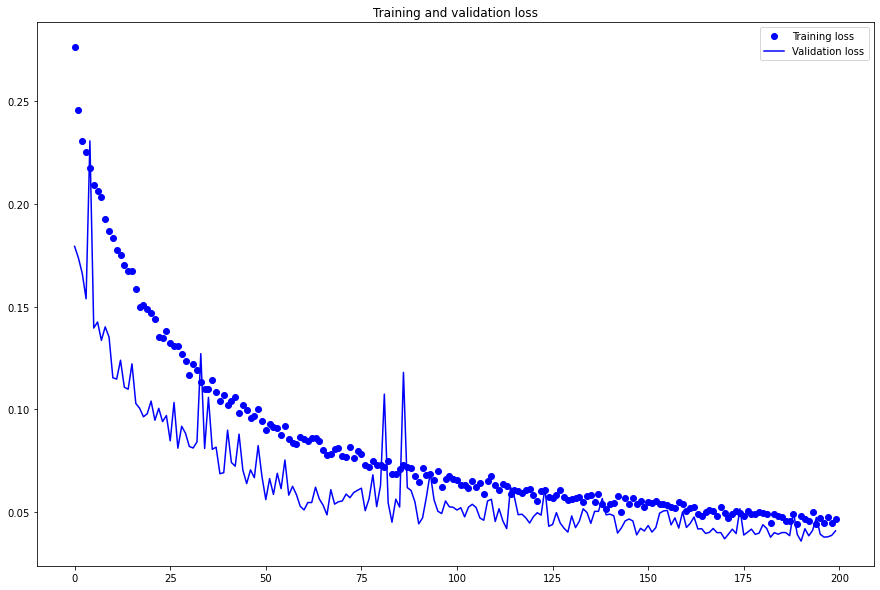

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(15,10))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## predict on test data

In [23]:
test_df = pd.read_csv("../data/test.csv", index_col=0)
test_df['id'] = test_df.index
test_df['id'] = test_df['id'].apply(lambda x: x+".jpg")
test_df.head()

,dist_0,ABS_RX,ABS_Y,id
2020-06-23_14-08-37-953144,93.85,0.0,0.6,2020-06-23_14-08-37-953144.jpg
2020-06-23_14-08-39-078661,116.64,-1.0,0.6,2020-06-23_14-08-39-078661.jpg
2020-06-23_14-08-40-214165,172.17,0.0,0.5,2020-06-23_14-08-40-214165.jpg
2020-06-23_14-08-41-266951,102.28,0.0,0.5,2020-06-23_14-08-41-266951.jpg
2020-06-23_14-08-42-331534,100.81,0.0,0.5,2020-06-23_14-08-42-331534.jpg


In [24]:
images = []
y_true = []

for i in test_df.index:
    img = image.load_img(f"../data/test/{i}.jpg", target_size=(150, 150))
    x = image.img_to_array(img)
    images.append(x)
    
    y_true.append(test_df.loc[i, "ABS_RX"])

images = np.asarray(images)
y_true = np.asarray(y_true)

In [25]:
print(images.shape)

(200, 150, 150, 3)


In [26]:
print(y_true.shape)

(200,)


In [27]:
images = images/255

In [28]:
pred = model.predict(images)
pred = pred.flatten()

In [29]:
pred.round(1)

array([ 0. , -0.9,  0.1,  0.7,  0.1, -0.7, -0.6, -0.9,  0.2, -0.8, -0.5,
        0. , -0.8, -0.5, -0.5,  0. ,  0. , -0.6, -0.6,  0.3,  0.1, -0.8,
       -0.7, -0.9,  0.5,  0.2, -0.7,  0. ,  0.5, -0.3, -0.1, -0.1,  0.1,
       -0.8, -0.7,  0.6,  0.2, -0.1,  0.2, -0.8,  0.9,  0.1,  0. , -0.9,
        0.2,  0. , -0.7, -0.8,  0.6, -0.8, -0.8,  0.2,  0. ,  0.1, -0.4,
       -0.8, -0.8,  0. , -0.5,  0. , -0. , -0.7,  0.1, -0.7, -0.7, -0.8,
       -0.7,  0.4,  0.1, -0.6,  0.1,  0. ,  0. ,  0.1,  0.1,  0.2, -0.7,
        0.5, -0.6,  0. ,  0.3, -0.6,  0. , -0.4,  0. ,  0. , -0.8,  0.7,
        0.1, -0.8, -0.9,  0.5, -0.8,  0. , -0.7, -0.7,  0.3,  0.1, -0.8,
       -0. ,  0.3, -0.8, -0.8,  0.5, -0.7,  0. ,  0.4,  0.5, -0.5, -0.8,
        0.1,  0.6, -0.9, -0.1,  0.3, -0.7, -0.8,  0.4, -0.8,  0.5, -0.8,
        0. , -0.7, -0.1,  0.1, -0.8, -0.6,  0.5,  0.1,  0.1,  0.5, -0.8,
       -0.5, -0.1, -0.7,  0. , -0.7, -0.7, -0.9, -0. ,  0.1,  0. , -0.7,
       -0.6,  0.1, -0.8,  0.5, -0. ,  0.4,  0. , -0

In [30]:
y_true

array([ 0. , -1. ,  0. ,  0. ,  0. , -1. , -1. , -1. ,  0. , -0.4, -0.9,
        0. , -1. , -0.9,  0. ,  0. ,  0. , -0.7,  0. ,  0. ,  0. , -1. ,
       -1. , -1. ,  0.6,  0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2,
       -1. , -1. ,  0.9, -0. , -0. ,  0. , -1. ,  1. , -0. ,  0. , -1. ,
        0. ,  0. , -1. , -1. ,  1. , -1. , -1. ,  0. ,  0. ,  0. ,  0. ,
       -1. , -1. ,  0. ,  0. ,  0. ,  0. , -1. ,  0. , -1. , -1. , -1. ,
       -1. ,  0.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,
        0. , -0.3,  0. , -0. ,  0. ,  0. ,  0. ,  0. , -0.4, -1. ,  1. ,
        0. , -1. , -1. ,  0.1, -1. ,  0. ,  0. , -1. ,  0. ,  0. , -1. ,
        0. ,  0.2, -1. , -1. ,  0.3, -1. ,  0. ,  0.7,  0. ,  0. , -0.4,
        0. ,  0. , -1. ,  0. ,  0. , -1. , -1. ,  0. , -0.9,  0.9, -1. ,
        0. , -0.9,  0. ,  0. , -1. , -0.7,  0. ,  0. ,  0. ,  0.6, -1. ,
       -0. ,  0.9, -0.4,  0. , -1. , -0.8,  0. , -0.6,  0. ,  0. , -0. ,
        0. ,  0. , -1. ,  0. ,  0. ,  0. ,  0. , -0

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, pred)

0.09923424979064861

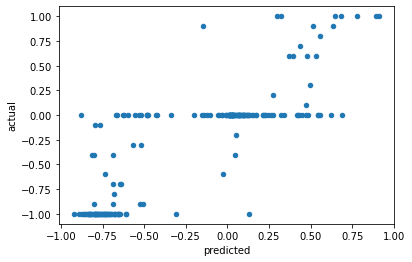

In [32]:
df = pd.DataFrame({'predicted': pred, 'actual':y_true})
ax = df.plot.scatter('predicted', 'actual')